In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
age_details=pd.read_csv(r"C:\Users\HP\Downloads\Covid-19\AgeGroupDetails.csv")
covid=pd.read_csv(r"C:\Users\HP\Downloads\Covid-19\covid_19_india.csv")
indi=pd.read_csv(r"C:\Users\HP\Downloads\IndividualDetails.csv")
data=pd.read_csv("C:/Users/HP/Downloads/covid.csv")

In [3]:
data.drop(columns=["current_location","government_id"],axis=1,inplace=True)

In [4]:
data['diagnosed_date'] = pd.to_datetime(data['diagnosed_date'])
data['status_change_date'] = pd.to_datetime(data['status_change_date'])

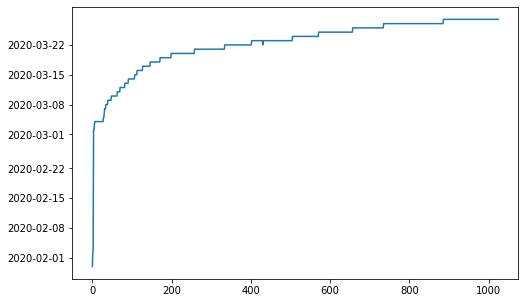

In [5]:
data['diagnosed_date'].plot(figsize=(8,5), legend=False)

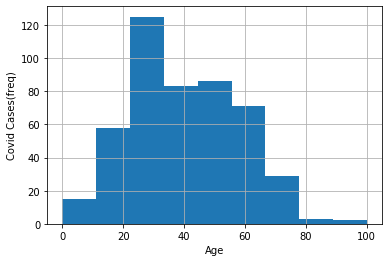

In [6]:
fig,ax = plt.subplots()
bins=np.linspace(0,100,10)
ax.hist(data['age'],bins=bins)
plt.grid()
plt.xlabel("Age")
plt.ylabel("Covid Cases(freq)")
plt.show()

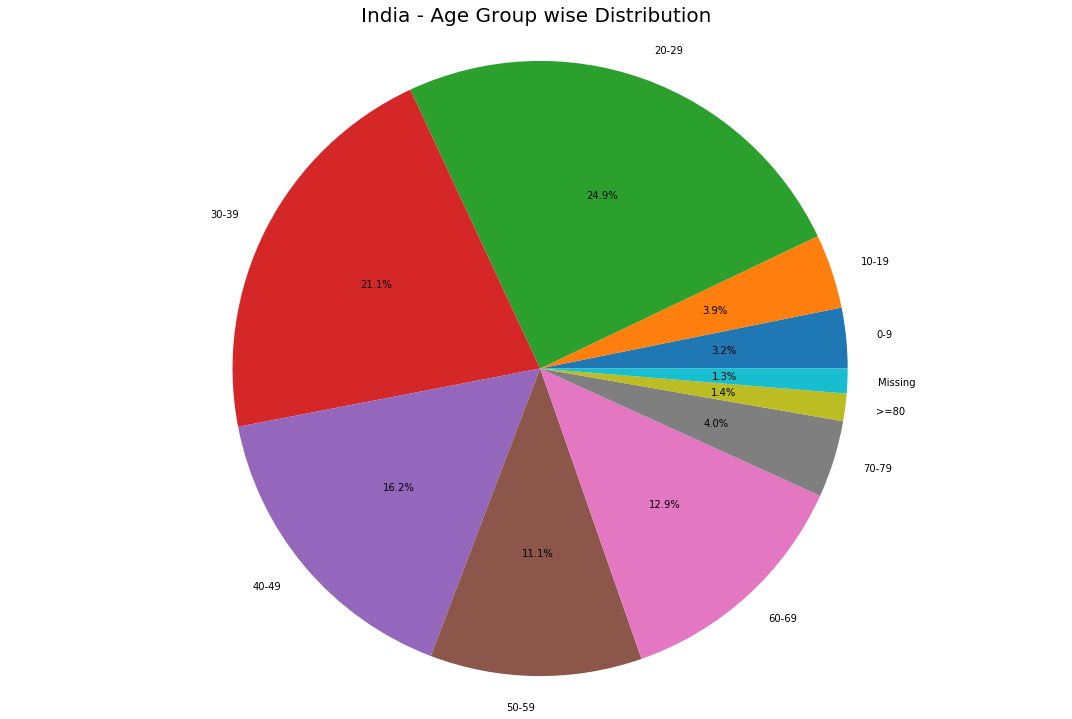

In [7]:
labels = list(age_details['AgeGroup'])
sizes = list(age_details['TotalCases'])
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [8]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
labels=le.fit_transform(age_details['AgeGroup'])
print(len(le.classes_))
print(le.classes_)

10
['0-9' '10-19' '20-29' '30-39' '40-49' '50-59' '60-69' '70-79' '>=80'
 'Missing']


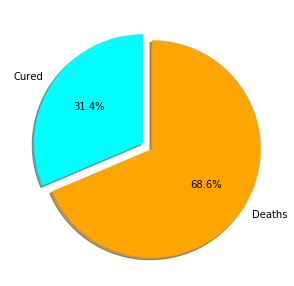

In [9]:
plt.figure(figsize=(5,5))
cured=covid[covid['Cured']==True]
deaths=covid[covid['Deaths']==True]
slices_hours = [cured['Time'].count(),deaths['Time'].count()]
activities = ['Cured', 'Deaths']
colors = ['aqua', 'orange']
explode=(0,0.1)
plt.pie(slices_hours, labels=activities,explode=explode, colors=colors, startangle=90, autopct='%1.1f%%',shadow=True)
plt.show()

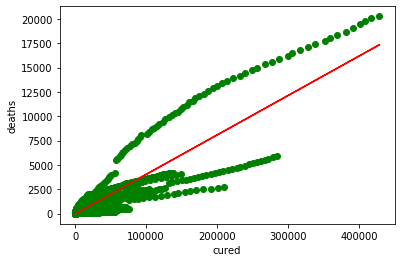

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

X=covid[['Cured']]
Y=covid[['Deaths']]
model.fit(X,Y)

Y_pred=model.predict(X)
plt.scatter(X,Y,color='green')
plt.plot(X,Y_pred,color='red')
plt.xlabel('cured')
plt.ylabel('deaths')

plt.show()

In [11]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_pred)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Absolute Error: 217.04827158370765
Mean Squared Error: 446149.89985702804
Root Mean Squared Error: 667.9445335183365
Root Mean Squared Error: 667.9445335183365


In [12]:
symptoms={'symptoms':['Fever','Tiredness','Dry-cough','Shortness of breath','aches and pains','Sore throat','Diarrhoea','Nausea','vomiting','abdominal pain'],'percentage':[98.6,69.9,82,16.6,14.8,13.9,10.1,10.1,3.6,2.2]
    
}
symptoms=pd.DataFrame(data=symptoms,index=range(10))
symptoms

,symptoms,percentage
0,Fever,98.6
1,Tiredness,69.9
2,Dry-cough,82.0
3,Shortness of breath,16.6
4,aches and pains,14.8
5,Sore throat,13.9
6,Diarrhoea,10.1
7,Nausea,10.1
8,vomiting,3.6
9,abdominal pain,2.2


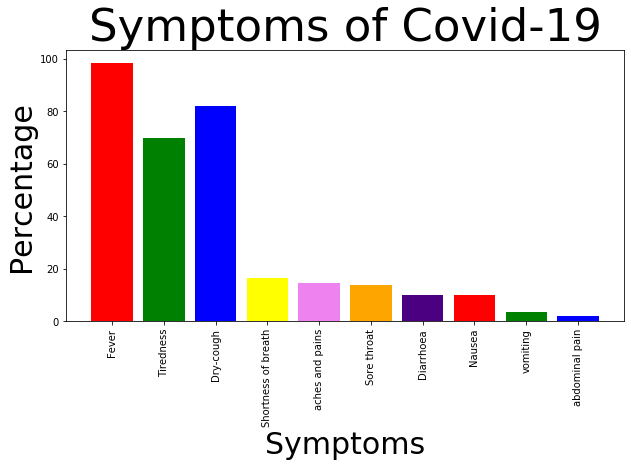

In [13]:
plt.figure(figsize=(10,5))
height=symptoms.percentage
bars=symptoms.symptoms
y_pos = np.arange(len(bars))

my_colors = ['red','green','blue','yellow','violet','orange','indigo']
plt.bar(y_pos, height,color=my_colors)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.xlabel("Symptoms", size=30)
plt.ylabel("Percentage", size=30)
plt.title("Symptoms of Covid-19", size=45)

plt.show()

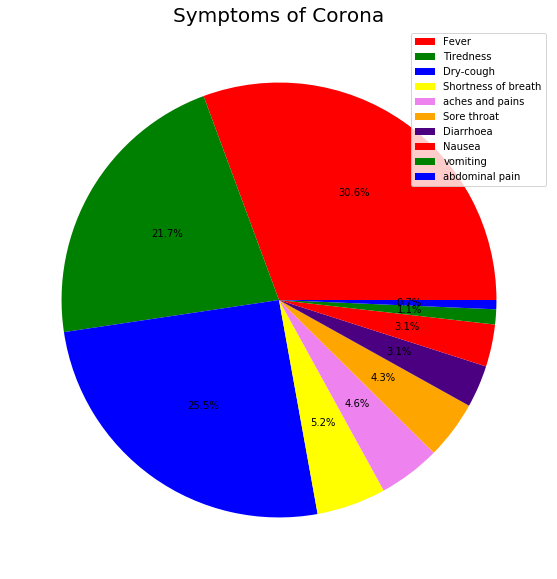

In [14]:
plt.figure(figsize=(10,10))
plt.title("Symptoms of Corona",fontsize=20)
plt.pie(symptoms["percentage"],colors = ['red','green','blue','yellow','violet','orange','indigo'],autopct="%1.1f%%")
plt.legend(symptoms['symptoms'],loc='best')
plt.show() 

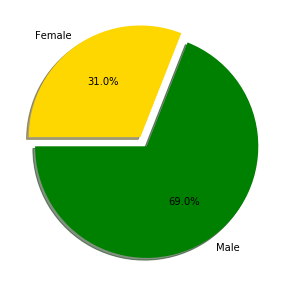

In [15]:
plt.figure(figsize=(5,10))
male=indi[indi['gender']=='M']
female=indi[indi['gender']=='F']
slices_hours = [male['age'].count(),female['age'].count()]
activities = ['Male', 'Female']
colors = ['green', 'gold']
explode=(0,0.1)
plt.pie(slices_hours, labels=activities,explode=explode, colors=colors, startangle=180, autopct='%1.1f%%',shadow=True)
plt.show()

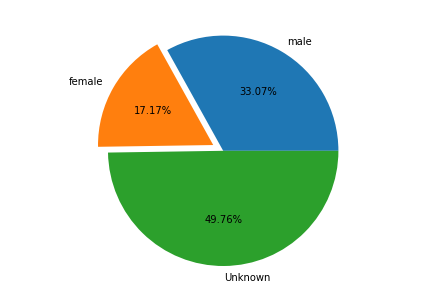

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
sex = ['male','female','Unknown']
explode=(0,0.1,0)

num=[339,176,510]
ax.pie(num,labels = sex,explode=explode,autopct='%1.2f%%')
plt.show()

In [17]:
sectors = ['schools & other educational organization shutdown','public places shutdown',
            'work from home started for employees','country under lockdown','current situation']
dates = ['2020-03-10','2020-03-13','2020-03-16','2020-03-21','2020-03-26']

In [18]:
data= data.sort_values(by="diagnosed_date")

In [19]:
school = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-09') # before school lockdown
school = len(data.loc[school])
public_places = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-12') #before public place shutdown
public_places = len(data.loc[public_places])
work_from_home= (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-15') # beforw wfh
work_from_home = len(data.loc[work_from_home])
under_lockdown = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-21') # under lockdown
under_lockdown= len(data.loc[under_lockdown])
current_situation= (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-26') # Current situation
current_situation= len(data.loc[current_situation])

In [20]:
case_counts = [school,public_places,work_from_home,under_lockdown,current_situation]

In [21]:
plot_data = pd.DataFrame({'dates':dates,'counts':case_counts,'Sectors':sectors})
plot_data

,dates,counts,Sectors
0,2020-03-10,47,schools & other educational organization shutdown
1,2020-03-13,81,public places shutdown
2,2020-03-16,112,work from home started for employees
3,2020-03-21,333,country under lockdown
4,2020-03-26,734,current situation


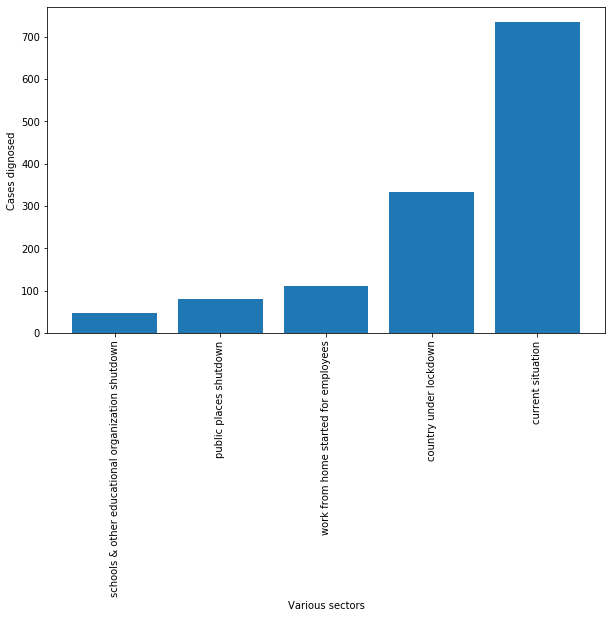

In [22]:
fig, ax = plt.subplots(figsize = (10,6))
labels = sectors

plt.bar(labels,case_counts)
plt.xticks(sectors,rotation=90)
plt.xlabel("Various sectors")
plt.ylabel("Cases dignosed")
plt.show()

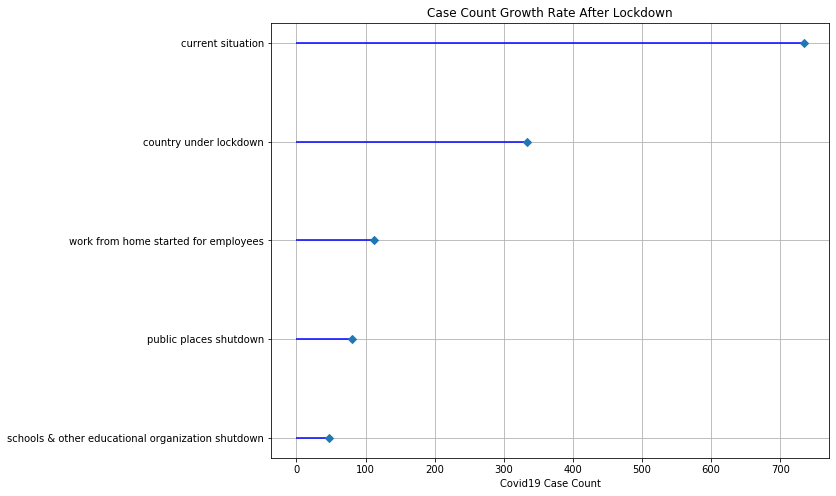

In [23]:
fig, ax = plt.subplots(figsize=(10,8))
plt.hlines(y=plot_data.Sectors, xmin=0, xmax=plot_data.counts, color='blue')
plt.plot(plot_data.counts, plot_data.Sectors, "D")
# Add titles and axis names
ax.xaxis.label.set_color('black')
plt.grid()
plt.yticks(plot_data.Sectors)
plt.title("Case Count Growth Rate After Lockdown")
plt.xlabel('Covid19 Case Count', fontsize=10)
plt.show()

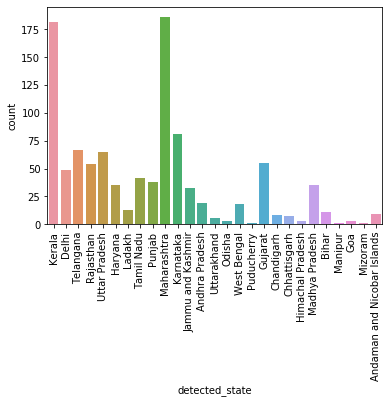

In [24]:
chart=sns.countplot(x = "detected_state", data = data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [25]:
Status = pd.DataFrame([974,31,18],index = ['Hospitalized','Recovered','Deceased'],columns = ['Count'])
Status

,Count
Hospitalized,974
Recovered,31
Deceased,18


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11140A90>],
      dtype=object)

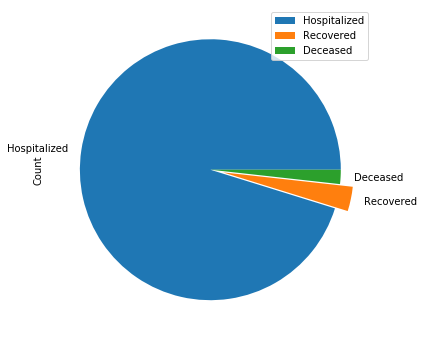

In [26]:
Status.plot(kind='pie',subplots=True,figsize=(6,6),explode=explode)